# Lecture 12 - Introduction to Exploratory Data Analysis

#### Announcements:


#### Goals:
*  Know some strategies for approaching a new dataset:
  * Know what basic (meta-)information you should find out before looking at the data itself.
  * Have a toolbox of first steps in summarizing, visualizing, and observing interesting or odd features about the data.


## Exploratory Analysis
* Previously (e.g., weather data in lab 2): *Hypothesis-driven analysis*
    > Hypothesis -> Dataset -> Insight
* Today: *Exploratory Data Analysis*:
    > Dataset -> ?? -> Insight

## The Dataset

In [1]:
import pandas as pd

### Demo Dataset

There's some data at this url:

In [2]:
data_url = "https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_23w/data/NHANES/NHANES.csv"

### So you have a dataset. What now?

What do you want to know about a dataset *before* you even look at it?
**Brainstorm**:
* Units of measurement of what?
* Are all the units the same?
* What is the dataset about?
* Why was it collected?
* Where did it come from?
* What data types are in it?
* When was it collected?
* How was it collected?
* How reliable is it?
* Does it have a name?
* Is there documentation?
* How big is it?
* Has it been cleaned or preprocessed in any way?
* How "clean" is it?
* How long do I have to analyze it?
* What are the column names / what do the columns mean?
* Is there missing data?


* What do the first five lines look like?

Some ideas:
* Who collected this data? When? Why?
> This data originates from the 2017-2018 edition of the [National Health and Nutrition Examination Survey](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2017), a survey conducted by the CDC of patients who are examined for various health and nutrition attributes. Many details of the who, why, and how are included on the linked webapge.
* What was the collection methodology? If the data is collected from a sample of a population, how was sampling done?
> Again, lots of info on the website, but a couple points of interest: the population is noninstitutionalized civilian US residents. Some groups are oversampled, including hispanic, black, asian, poor, and those aged 80+.
* How big is the data?
> Quoting from the website: In 2017-2018, 16,211 persons were selected for NHANES from 30 different survey locations. Of those selected, 9,254 completed the interview and 8,704 were examined.
* What do the fields (columns) mean?
> See the "Examination Data" link > "Doc File".
>
> Since the original dataset has a *lot* of columns, I did a little preprocessing to pare it down. You can find my preprocessing notebook [here](https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L12/L12_NHANES_preprocessing.ipynb). I've selected a subset of columns related to body measurements (height, weight, arm length, etc.) and included age and gender from demographics.


To help us out when analyzing the data, I'm going to build a dictionary that maps original column names to friendlier ones. Now that we've answered our basic questions, let's also load up the data.

In [3]:
cols_renamed = {"SEQN": "SEQN",
                "RIAGENDR": "Gender", # 1 = M, 2 = F
                "RIDAGEYR": "Age", # years
                "BMXWT": "Weight", # kg
                "BMXHT": "Height", # cm
                "BMXLEG": "Leg", # cm
                "BMXARML": "Arm", # cm
                "BMXARMC": "Arm Cir", # cm
                "BMXWAIST": "Waist Cir"} # cm

df = pd.read_csv(data_url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8704 entries, 0 to 8703
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      8704 non-null   float64
 1   RIAGENDR  8704 non-null   float64
 2   RIDAGEYR  8704 non-null   float64
 3   BMXWT     8580 non-null   float64
 4   BMXHT     8016 non-null   float64
 5   BMXLEG    6703 non-null   float64
 6   BMXARML   8177 non-null   float64
 7   BMXARMC   8173 non-null   float64
 8   BMXWAIST  7601 non-null   float64
dtypes: float64(9)
memory usage: 612.1 KB


In [4]:
df

SEQN  RIAGENDR  RIDAGEYR  BMXWT  BMXHT  BMXLEG  BMXARML  BMXARMC  \
0      93703.0       2.0       2.0   13.7   88.6     NaN     18.0     16.2   
1      93704.0       1.0       2.0   13.9   94.2     NaN     18.6     15.2   
2      93705.0       2.0      66.0   79.5  158.3    37.0     36.0     32.0   
3      93706.0       1.0      18.0   66.3  175.7    46.6     38.8     27.0   
4      93707.0       1.0      13.0   45.4  158.4    38.1     33.8     21.5   
...        ...       ...       ...    ...    ...     ...      ...      ...   
8699  102952.0       2.0      70.0   49.0  156.5    34.4     32.6     25.1   
8700  102953.0       1.0      42.0   97.4  164.9    38.2     36.6     40.6   
8701  102954.0       2.0      41.0   69.1  162.6    39.2     35.2     26.8   
8702  102955.0       2.0      14.0  111.9  156.6    39.2     35.0     44.5   
8703  102956.0       1.0      38.0  111.5  175.8    42.5     38.0     40.0   

      BMXWAIST  
0         48.2  
1         50.0  
2        101.8  
3         79.3  
4         64.1  
...        ...  
8699      82.2  
8700     114.8  
8701      86.4  
8702     113.5  
8703     122.0  

[8704 rows x 9 columns]

Let's rename those columns:

In [5]:
df = df.rename(cols_renamed, axis='columns')
df = df.drop("SEQN", axis='columns') # we don't care about sequence # - it's just an ID
df

Gender   Age  Weight  Height   Leg   Arm  Arm Cir  Waist Cir
0        2.0   2.0    13.7    88.6   NaN  18.0     16.2       48.2
1        1.0   2.0    13.9    94.2   NaN  18.6     15.2       50.0
2        2.0  66.0    79.5   158.3  37.0  36.0     32.0      101.8
3        1.0  18.0    66.3   175.7  46.6  38.8     27.0       79.3
4        1.0  13.0    45.4   158.4  38.1  33.8     21.5       64.1
...      ...   ...     ...     ...   ...   ...      ...        ...
8699     2.0  70.0    49.0   156.5  34.4  32.6     25.1       82.2
8700     1.0  42.0    97.4   164.9  38.2  36.6     40.6      114.8
8701     2.0  41.0    69.1   162.6  39.2  35.2     26.8       86.4
8702     2.0  14.0   111.9   156.6  39.2  35.0     44.5      113.5
8703     1.0  38.0   111.5   175.8  42.5  38.0     40.0      122.0

[8704 rows x 8 columns]

### So you loaded a dataset. What now?
Brainstorm:
* Plot things
* Assess missing data (clean or fill or drop or something?)
* Summary statistics
* Look at what's numerical vs categorical
* Look for correlations / relationships among variables

Some ideas:
* look at a few rows
* compute summary statistics (of numerical columns)
* Look at distribution of each column
* Look at pairwise scatter plots of all pairs of (numerical) columns

#### Look at some rows
Which ones?
* Maybe the first few, or a few random ones, to get a look at some arbitrary data.
* Maybe some extremes - what does the tallest person look like? Longest-armed?

In [8]:
# First few rows:
df.iloc[:5]

Gender   Age  Weight  Height   Leg   Arm  Arm Cir  Waist Cir
0     2.0   2.0    13.7    88.6   NaN  18.0     16.2       48.2
1     1.0   2.0    13.9    94.2   NaN  18.6     15.2       50.0
2     2.0  66.0    79.5   158.3  37.0  36.0     32.0      101.8
3     1.0  18.0    66.3   175.7  46.6  38.8     27.0       79.3
4     1.0  13.0    45.4   158.4  38.1  33.8     21.5       64.1

In [9]:
# Two tallest people:
df.sort_values(by="Height", ascending=False).iloc[:2]

Gender   Age  Weight  Height   Leg   Arm  Arm Cir  Waist Cir
2614     1.0  65.0    97.5   197.7  44.0  44.3     30.9      100.4
8247     1.0  34.0    89.9   195.8  46.0  49.9     32.5       88.2

In [10]:
# What's that in feet, inches?
df.sort_values(by="Height", ascending=False).iloc[:2]["Height"] / 2.54 / 12

2614    6.486220
8247    6.423885
Name: Height, dtype: float64

#### Compute summary statistics (of numerical columns)

In [11]:
df.describe()

Gender           Age       Weight       Height          Leg  \
count  8704.000000  8.704000e+03  8580.000000  8016.000000  6703.000000   
mean      1.509076  3.443865e+01    65.138508   156.593401    38.643980   
std       0.499946  2.537904e+01    32.890754    22.257858     4.158013   
min       1.000000  5.397605e-79     3.200000    78.300000    24.800000   
25%       1.000000  1.100000e+01    43.100000   151.400000    35.800000   
50%       2.000000  3.100000e+01    67.750000   161.900000    38.800000   
75%       2.000000  5.800000e+01    85.600000   171.200000    41.500000   
max       2.000000  8.000000e+01   242.600000   197.700000    55.000000   

               Arm      Arm Cir    Waist Cir  
count  8177.000000  8173.000000  7601.000000  
mean     33.667996    29.193589    89.928851  
std       7.229185     7.970648    22.805093  
min       9.400000    11.200000    40.000000  
25%      32.000000    23.800000    73.900000  
50%      35.800000    30.100000    91.200000  
75%      38.400000    34.700000   105.300000  
max      49.900000    56.300000   169.500000

#### Maybe take stock of missing data?

In [16]:
len(df) # how many values are there?

8704

In [17]:
df.isna().sum() / len(df) * 100 # what percent of each column is missing?

Gender        0.000000
Age           0.000000
Weight        1.424632
Height        7.904412
Leg          22.989430
Arm           6.054688
Arm Cir       6.100643
Waist Cir    12.672335
dtype: float64

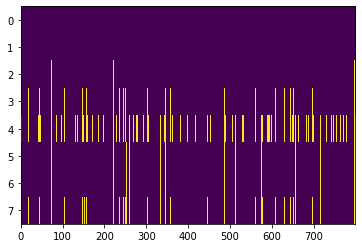

In [19]:
import matplotlib.pyplot as plt
plt.imshow(df.isna().iloc[:800,:].T.to_numpy(), aspect='auto', interpolation='none')

#### Look at distribution of each column

Histograms! I love histograms!

In [20]:
print(len(df.columns))

8


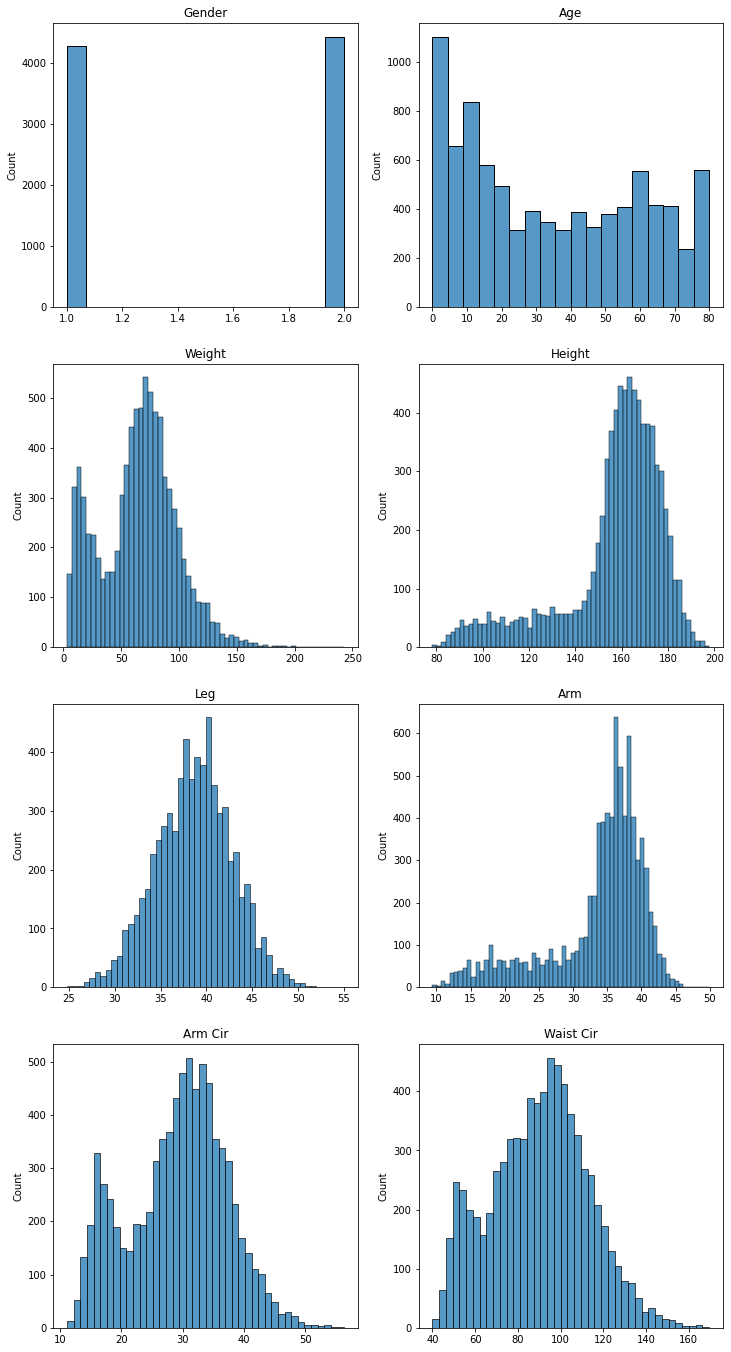

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(4, 2, figsize=(12, 24))

for col, ax in zip(df.columns, axes.flatten()):
    sns.histplot(data=df[col].values, ax=ax)
    ax.set_title(col)
plt.show()

#### Look at pairwise scatter plots of all pairs of (numerical) columns


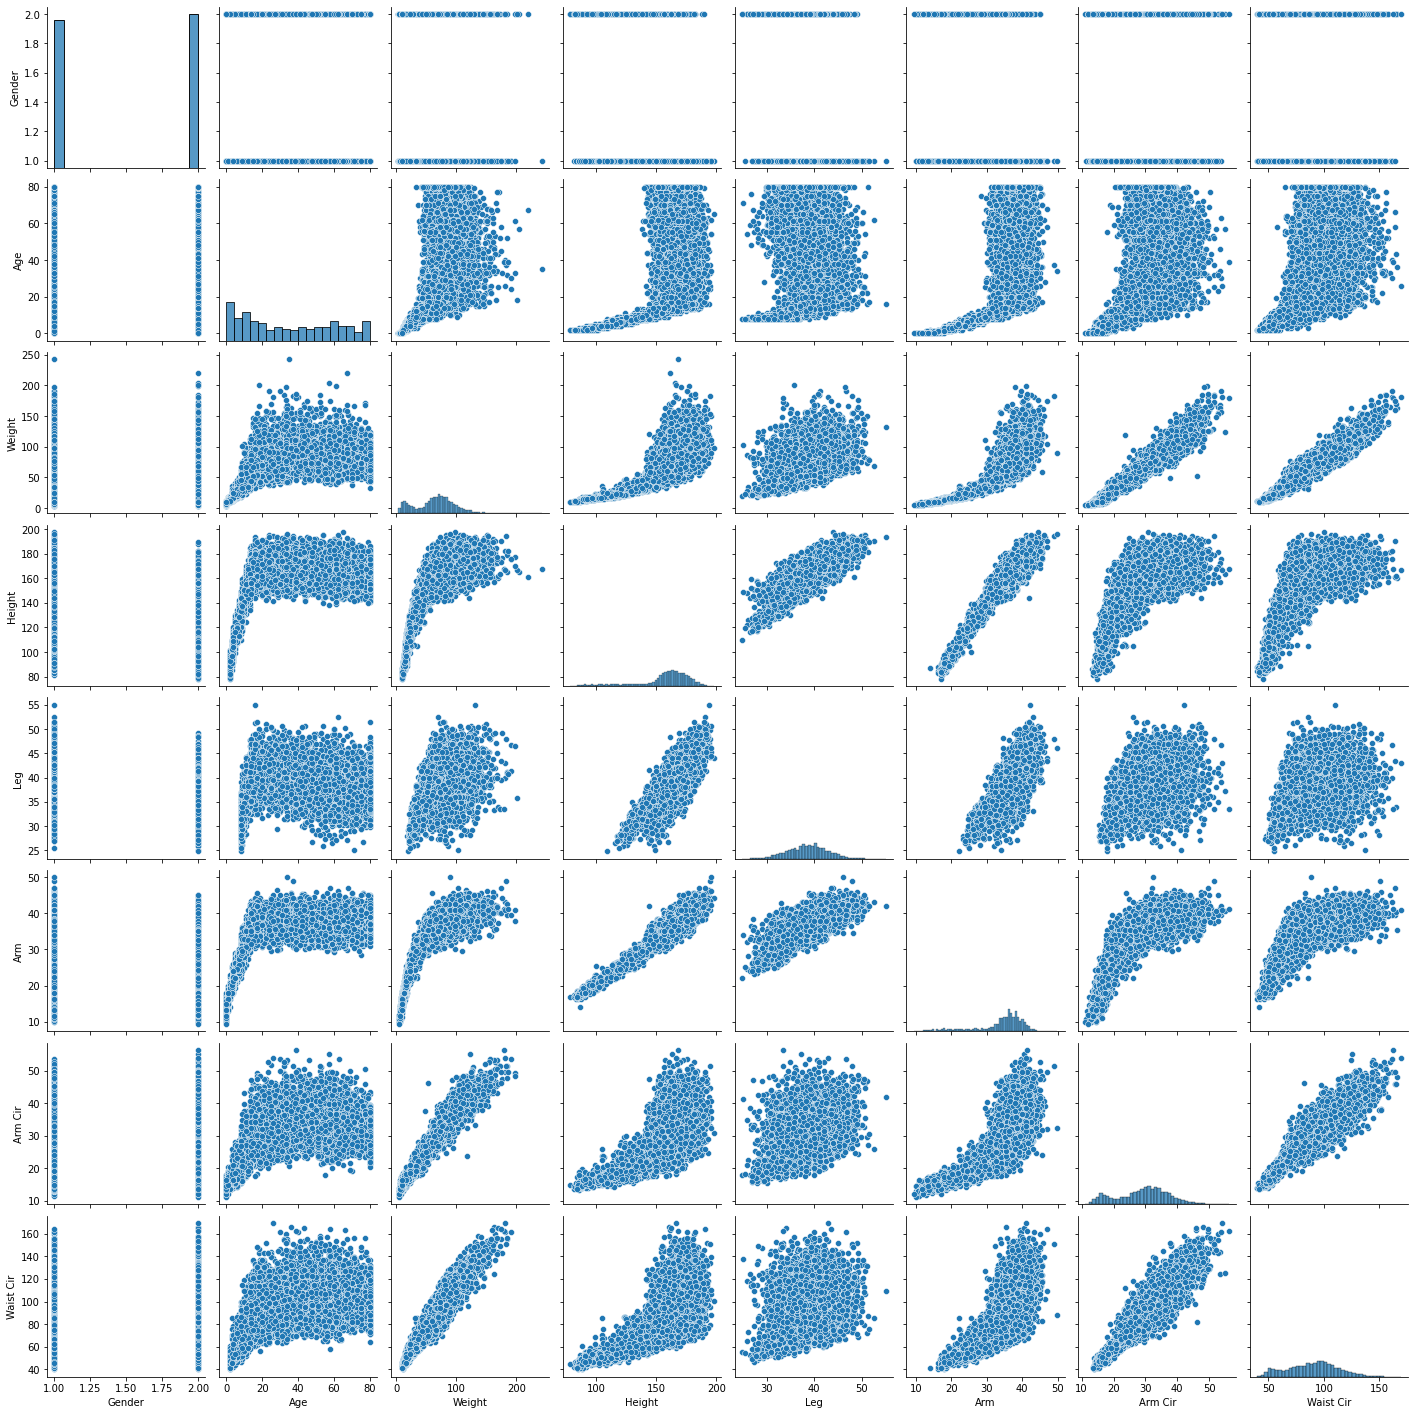

In [22]:
sns.pairplot(data=df)

What if we consider only adults (21+)?

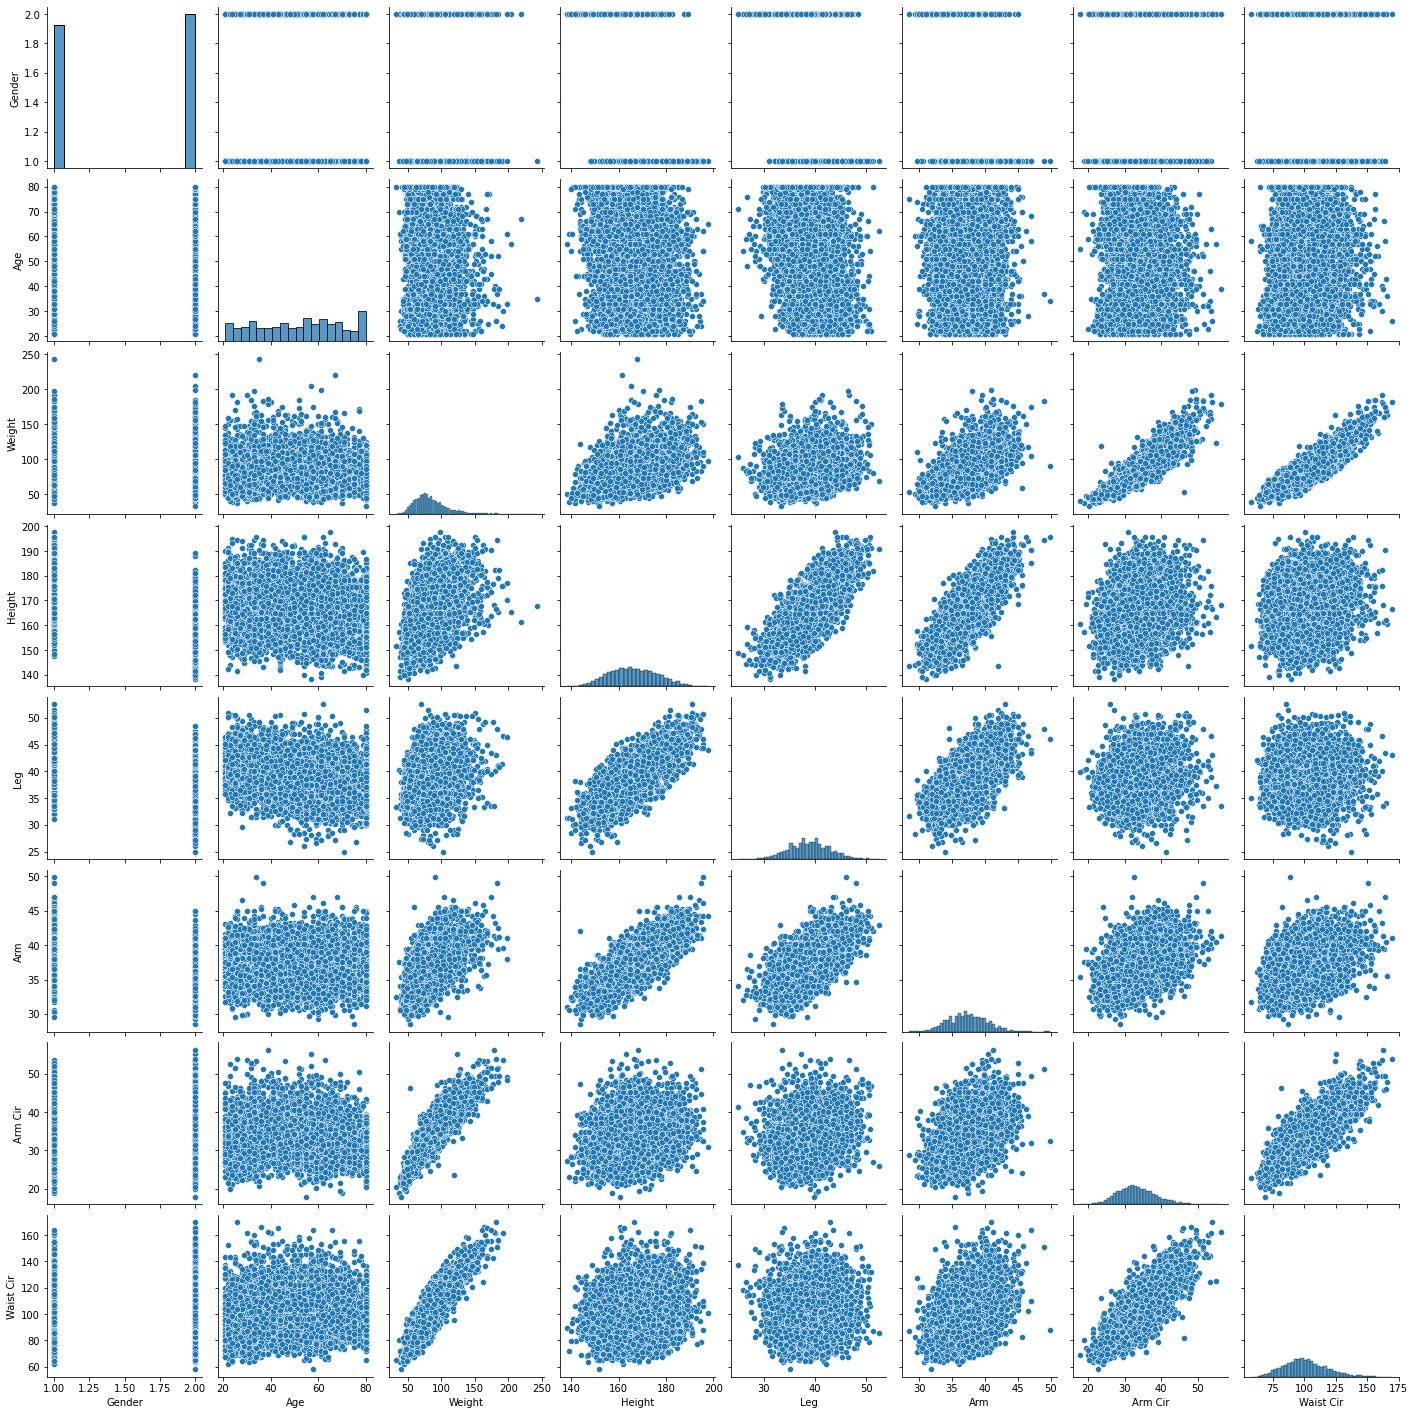

In [23]:
sns.pairplot(data=df[df["Age"]>=21])

To-do list - did we do all of this?
* [ ] Basic meta info:
  * [ ] who/what/why/when was the data collected?
  * [ ] how much data is there? if too much, can you sensibly subsample?
  * [ ] what are the columns and what do they mean?
* [ ] Diving into the data:
  * [ ] look at a few rows
  * [ ] summary stats; Tukey's five # summary
  * [ ] Distributions of each column
  * [ ] Pairwise scatter plots